In [0]:
import numpy as np 
from numpy import linalg as LA 
import scipy as sp
import math
from google.colab import drive
import os
import matplotlib.pyplot as plt 

#mount your Google drive into this notebook
drive.mount('/content/gdrive')
#find the path to your Google drive root
os.getcwd()+"/gdrive/My Drive"
os.chdir('/content/gdrive/My Drive/Colab Notebooks/Data Mining/HW7')

In [2]:
A = np.loadtxt('A.csv', delimiter= ',')
print(A.shape)
U, s, Vt = LA.svd(A, full_matrices=False)
print(U.shape, s.shape, Vt.shape)
#convert s to diagonal matrix
S = np.diag(s)

#Question 1A
for k in range(1,20):
  Uk = U[:,:k]
  Sk = S[:k,:k]
  Vtk = Vt[:k,:]
  Ak = Uk @ Sk @ Vtk
  print('k = ',k,'L2 norm difference is %.2f' % LA.norm(A-Ak,2))

#Question 1B  
  if LA.norm(A-Ak,2) < 0.1*LA.norm(A,2):
    print('L2 norm of A is %.2f' % LA.norm(A,2))
    print('k= %d'%k);

(4000, 20)
(4000, 20) (20,) (20, 20)
k =  1 L2 norm difference is 106.80
k =  2 L2 norm difference is 98.93
k =  3 L2 norm difference is 93.82
k =  4 L2 norm difference is 75.57
k =  5 L2 norm difference is 62.99
k =  6 L2 norm difference is 61.57
k =  7 L2 norm difference is 27.68
k =  8 L2 norm difference is 26.45
k =  9 L2 norm difference is 26.27
k =  10 L2 norm difference is 24.60
k =  11 L2 norm difference is 23.17
k =  12 L2 norm difference is 22.45
k =  13 L2 norm difference is 20.34
k =  14 L2 norm difference is 20.03
k =  15 L2 norm difference is 19.55
k =  16 L2 norm difference is 18.96
k =  17 L2 norm difference is 15.06
k =  18 L2 norm difference is 14.28
k =  19 L2 norm difference is 5.90
L2 norm of A is 123.85
k= 19


(4000, 4000)


<Figure size 1440x720 with 0 Axes>

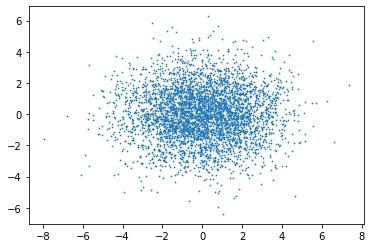

<Figure size 1440x720 with 0 Axes>

In [14]:
n = 4000
oneoneT = np.ones((n, n))
iden = np.identity(n)
Cn = iden - (1/n)*(oneoneT)
print(Cn.shape)
A_center = Cn @ A

U_new, s_new, Vt_new = LA.svd(A_center, full_matrices=False)
S_new = np.diag(s_new)

k = 2
Uck = U_new[:,:k]
Sck = S_new[:k,:k]
Vtck = Vt_new[:k,:]
Ack = Uck @ Sck @ Vtck # Ak is matrix with reduced dimension of k=2

#reduce to 2 dimension : Vt 20 x 2
#V_2 = Vt_new[:2,:].transpose() # the first 2 right singular values
#Vck = Vtck.transpose() # the first 2 right singular values

# Projection of all points on the eigen vectors
PointsToPlot = Ack.dot(Vtck.transpose())
#PointsToPlot = Ak.dot(Vtk.transpose())
plt.scatter(PointsToPlot[:,0], PointsToPlot[:,1], s=0.5)
plt.figure(figsize=(20,10))

In [129]:
#Frequent Direction
A = np.loadtxt('A.csv', delimiter= ',')
#print(A)
def freq_dir(A,l):
  n = A.shape[0] # n is row of matrix A
  d = A.shape[1] # d is dimension of matrix A
  B = np.zeros([l, d]) #set B all zeros (2l x d)
  B[:l-1, :] = A[:l-1,:]  #Initialize the first 2l-1 rows ai of A as B, last row left as all zeros.
  for i in range (l-1,n):
    B[l-1,:] = A[i,:] # put ai in the zero-valued row of B
    #print(B)
    U,s,Vt = LA.svd(B,full_matrices=False)
    #print(B.shape, U.shape, s.shape, Vt.shape) 
    delta =  s[l-1]**2
    #print(delta)
    s_ = [math.sqrt(i**2 - delta) for i in s]
    #print(s_)
    S_ = np.diag(s_)
    #print(S_.shape)
    #print (Vt.shape)
    B = S_ @ Vt
    #print(B)
  return B

A_Fnorm = LA.norm(A, 'fro')**2
print(A_Fnorm/10)

for l in range (1,3):
   print("",l)
   print(freq_dir(A,l))
   print(LA.norm(A.T @ A - B.T @ B))

6462.897613721931
 1
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
24564.119695608282
 2
[[ 1.00130873 -0.23657776  0.47305546 -0.03055551  0.0675456   1.49199885
   0.20916886 -0.73998596 -2.57350583 -0.94093926  1.3163815  -1.05427414
   0.11754965 -1.38114295 -1.73669473  1.82978023  0.88773649  0.4025831
   1.4181173   0.89886352]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]]
24564.119695608282
